# `MDPGridworld-v0`:
This version of the 3×4 grid world is deterministic. The set-up for this problem is based from this [blog post](https://goo.gl/GqkyzT).

## **States** or **Observation**
States are represented with scalar values in the range 0 to 11. Below is a diagram of the corresponding states.

    ```
    +---+---+---+---+
    | 0 | 1 | 2 | 3 |
    +---+---+---+---+
    | 4 | 5 | 6 | 7 |
    +---+---+---+---+
    | 8 | 9 | 10| 11|
    +---+---+---+---+

    +---+---+---+---+
    |   |   |   | G |   S - Starting state
    +---+---+---+---+   G - Goal
    |   | # |   | F |   F - Fire (very bad state)
    +---+---+---+---+   # - Wall
    | S |   |   |   |
    +---+---+---+---+
    ```

In [7]:
import gym
env = gym.make('MDPGridworld-v0')

In [6]:
print(env.observation_space) # give access to the Discrete state object
print(env.observation_space.n) # give access to scalar value representing range for the states

Discrete(12)
12


## **Actions**

Below are the scalar values for all possible actions in each non-terminal state. Agent keeps the same state when taking an action towards a wall.

    ```
    0 - North
    1 - South 
    2 - West 
    3 - East
    ```

In [6]:
print(env.action_space) # give access to the Discrete action object
print(env.action_space.n) # give access to scalar value representing range for the available actions

Discrete(4)
4


## **Rewards**
`r(3) = +100`, `r(7) = -100`. Other states has a reward of `-3`.

In [16]:
env.reset()
action = 0
next_state, reward, terminal, info = env.step(action)
# terminal is a return value of the environment's step method
print(next_state, reward, terminal, info)

4 -3 False {'prob': 1.0}


## **Transition Probabilities**
This provides you access to the transition probability, that taking action `a` at current state `s`, what is the probabilty of reaching next state `s'`

In [46]:
state = 8
action = 0 # North
print(env.P[state][action])
# [(1.0, 4, -3, False)]
# [(transition probability, next_state, reward, terminal)]

AttributeError: 'TimeLimit' object has no attribute 'P'

## demo1: random action

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gym

env = gym.make('MDPGridworld-v0')
N_EPSD=100
DISP_STEP=5
history=np.zeros(N_EPSD)

for i_episode in range(N_EPSD):
    obs = env.reset()
    for t in range(100):
        if i_episode % DISP_STEP == 0:
            env.render()
        # time.sleep(.5) # uncomment to slow down the simulation
        action = env.action_space.sample() # act randomly
        obs2, reward, terminal, _ = env.step(action)
        if terminal:
            env.render()
            print("Episode {} finished after {} timesteps".format(i_episode,t+1))
            history[i_episode]=t+1
            break

+----+
|   G|
| | F|
|S   |
+----+

+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
Episode 0 finished after 11 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (West)
Episode 1 finished after 100 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (North)
Episode 2 finished after 18 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (North)
Episode 3 finished after 5 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (North)
Episode 4 finished after 5 timesteps
+----+
|   G|
| | F|
|S   |
+----+

+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |


+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode 42 finished after 83 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (North)
Episode 43 finished after 7 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode 44 finished after 17 timesteps
+----+
|   G|
| | F|
|S   |
+----+

+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode 45 finished after 15 timesteps
+----+
|  

+----+
|   G|
| | F|
|S   |
+----+
  (North)
Episode 81 finished after 42 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode 82 finished after 57 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode 83 finished after 56 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode 84 finished after 36 timesteps
+----+
|   G|
| | F|
|S   |
+----+

+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|

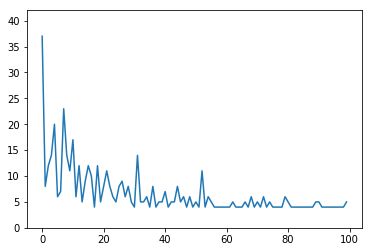

In [41]:
plt.ylim(0,history.max()+5)
plt.plot(history)

In [112]:
# from https://github.com/vmayoral/basic_reinforcement_learning/tree/master/tutorial1import random
import random

class QLearn:
    def __init__(self, actions, epsilon=0.1, alpha=0.2, gamma=0.9):
        self.q = {}

        self.epsilon = epsilon  # exploration constant
        self.alpha = alpha      # discount constant
        self.gamma = gamma
        self.actions = actions

    def getQ(self, state, action):
        return self.q.get((state, action), 0.0)
        # return self.q.get((state, action), 1.0)

    def learnQ(self, state, action, reward, value):
        '''
        Q-learning:        
            Q(s, a) += alpha * (reward + max(Q(s')) - Q(s,a))
        '''
        oldq = self.q.get((state, action), None)
        if oldq is None:
            self.q[(state, action)] = reward
        else:
            self.q[(state, action)] = oldq + self.alpha * (value - oldq)

    def chooseAction(self, state):
        if random.random() < self.epsilon:
            action = random.choice(self.actions)
        else:
            q = [self.getQ(state, a) for a in self.actions]
            maxQ = max(q)
            count = q.count(maxQ)
            # In case there're several state-action max values 
            # we select a random one among them
            if count > 1:
                best = [i for i in range(len(self.actions)) if q[i] == maxQ]
                i = random.choice(best)
            else:
                i = q.index(maxQ)

            action = self.actions[i]
        return action

    def learn(self, state1, action1, reward, state2):
        maxqnew = max([self.getQ(state2, a) for a in self.actions])
        self.learnQ(state1, action1, reward, reward + self.gamma*maxqnew)

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gym

env = gym.make('MDPGridworld-v0')
N_EPSD=100
DISP_STEP=5
history=np.zeros(N_EPSD)

rl=QLearn(actions=list(range(env.action_space.n)),
                                alpha=0.1, gamma=0.9, epsilon=0.1)

for i_episode in range(N_EPSD):
    obs = env.reset()
    for t in range(100):
        if i_episode % DISP_STEP == 0:
            env.render()
        # time.sleep(.5) # uncomment to slow down the simulation
        action = rl.chooseAction(obs) # act randomly
        obs2, reward, terminal, _ = env.step(action)
        rl.learn(obs, action, reward, obs2)
        if terminal:
            env.render()
            print("Episode finished after {} timesteps".format(t+1))
            history[i_episode]=t+1
            break
        obs = obs2

+----+
|   G|
| | F|
|S   |
+----+

+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+

+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode finished after 6 timesteps
+----+
|   G|
| | F|
|S   |
+----+

+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode finished after 5 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode finished after 7 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode finished after 6 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode finished after 5 timesteps
+----+
|   G|
| | F|
|S   |
+----+
  (East)
Episode finished after 5 timesteps
+----+
|   G|
| | F|
|S   |
+----+

+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
| 

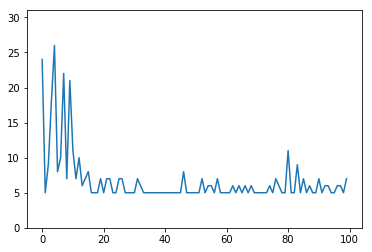

In [118]:
plt.ylim(0,history.max()+5)
plt.plot(history)

In [119]:
print(rl.q)

{(1, 2): 21.926377894855396, (0, 0): 15.93690368704625, (8, 2): 1.2258320467086983, (11, 2): -3.77787, (9, 3): -3.4263851067300006, (9, 0): -4.7902605363570006, (2, 1): 8.4563036772, (6, 0): 55.618940391, (11, 0): -100.0, (1, 3): 86.99238226519539, (2, 3): 100.0, (10, 1): -3.5373, (8, 0): 54.209411563668624, (4, 2): 13.57003972404737, (1, 0): 11.63341747159947, (10, 3): -3.5373, (0, 3): 75.24458972217084, (4, 0): 64.46421013444066, (0, 1): 6.719103644341077, (8, 3): -5.717914171197223, (11, 1): -3.5373, (2, 0): 14.1, (9, 2): -4.54304070301953, (6, 1): -3, (11, 3): -3.801927, (0, 2): 20.58230401724513, (6, 3): -100.0, (8, 1): -5.576710558127489, (6, 2): -3, (4, 3): 1.2053011281792534, (2, 2): -3, (9, 1): -4.5700258944000005, (10, 0): 7.668818340000001, (4, 1): -2.153716056066587, (1, 1): 17.336908683208144, (10, 2): -3.2943}


In [115]:
for s in range(env.observation_space.n):
    q = [rl.getQ(s, a) for a in range(env.action_space.n)]
    
    print(max(q))
    print(q.index(max(q)))

-5.294744484698102
3
-3.0
3
0.0
3
0.0
0
-6.961268405379029
1
0.0
0
0.0
3
0.0
0
-8.127221514214156
3
-5.69961297897655
3
-3.0
0
0.0
0


In [120]:
Q = np.array([[rl.getQ(s, a) for a in rl.actions] for s in range(env.observation_space.n)])
print(Q)
#print(Q.max(axis=1))
argmaxQ=Q.argmax(axis=1)
print(argmaxQ)
for s in range(env.observation_space.n):
    print("{}".format(["^","v","<",">"][argmaxQ[s]]), end='')
    if (s+1) % 4 == 0:
        print("")

[[  15.93690369    6.71910364   20.58230402   75.24458972]
 [  11.63341747   17.33690868   21.92637789   86.99238227]
 [  14.1           8.45630368   -3.          100.        ]
 [   0.            0.            0.            0.        ]
 [  64.46421013   -2.15371606   13.57003972    1.20530113]
 [   0.            0.            0.            0.        ]
 [  55.61894039   -3.           -3.         -100.        ]
 [   0.            0.            0.            0.        ]
 [  54.20941156   -5.57671056    1.22583205   -5.71791417]
 [  -4.79026054   -4.57002589   -4.5430407    -3.42638511]
 [   7.66881834   -3.5373       -3.2943       -3.5373    ]
 [-100.           -3.5373       -3.77787      -3.801927  ]]
[3 3 3 0 0 0 0 0 0 3 0 1]
>>>^
^^^^
^>^v
